<a href="https://colab.research.google.com/github/ngebodh/MachineLearning/blob/master/DeepLearning/ImageRecog/DeepLearningWithKeras_ImageRecog_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Recognition Using Keras-VGG16

## About this project
Our goal with this library is to leverage a pretrained model to perform image classification. We will use the VGG16 model trained on the ImageNet dataset to perform some simple image classification. 

The process will work similar to the image below:

____________________________________________________________________________________________________
<img src="https://miro.medium.com/v2/resize:fit:1200/1*ATIx1SmkEH0FaL_5fMvX2w.jpeg" width="50%" hight="10%">



## Import Libraries 

Here we import the libraries that we will be using throughout the notebook.

The libraries that we will be using include:<br/>
* [Numpy](https://www.numpy.org/)
* [Keras](https://keras.io/) using the [Tensorflow](https://www.tensorflow.org/) backend:
    * Keras-[VGG16](https://neurohive.io/en/popular-networks/vgg16/)
    * Keras-image processing library
* [Matplotlib](https://matplotlib.org/) <-for plotting and visualizations


In [1]:
#Import

import numpy as np
from keras.applications import vgg16
from keras.preprocessing import image

#Image visualization
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


In [2]:
model = vgg16.VGG16(weights='imagenet') #Load the model weights

W0820 06:55:47.559752 139747390875520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0820 06:55:47.580525 139747390875520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0820 06:55:47.584277 139747390875520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0820 06:55:47.619110 139747390875520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0820 06:55:49.527782 139747390875520 deprecation_wrapp

## Load an Image

Now we're going to load an image in and walk through the processing steps so that we can successfully load the image into Keras.
We're going to pick an image that's a little tricky to see how the model does at predicting what's in the image. 

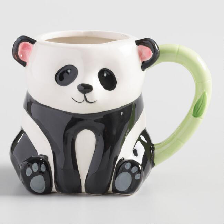

In [3]:
imgaddress='panda.jpeg'
img = image.load_img(imgaddress,target_size=(224,224)) #Try loading an image with the size specified 
img #Show image

In [4]:
# Convert to Numpy array
arr = image.img_to_array(img) #Here we convert the image to a numpy array inorder to do further numeric manipulations to it.
arr.shape #Height X Width X Color channel (RGB)

(224, 224, 3)

In [5]:
# Expand dimension
arr = np.expand_dims(arr,axis=0) #Here we add an additional dimension to satisfy the input parameters for keras
arr.shape #print out shape of image

(1, 224, 224, 3)

In [6]:
# Preprocessing
arr = vgg16.preprocess_input(arr) #Normalize data.
arr 

array([[[[126.061, 113.221, 106.32 ],
         [126.061, 113.221, 106.32 ],
         [126.061, 113.221, 106.32 ],
         ...,
         [127.061, 114.221, 107.32 ],
         [127.061, 114.221, 107.32 ],
         [127.061, 114.221, 107.32 ]],

        [[126.061, 113.221, 106.32 ],
         [126.061, 113.221, 106.32 ],
         [126.061, 113.221, 106.32 ],
         ...,
         [127.061, 114.221, 107.32 ],
         [127.061, 114.221, 107.32 ],
         [127.061, 114.221, 107.32 ]],

        [[126.061, 113.221, 106.32 ],
         [126.061, 113.221, 106.32 ],
         [126.061, 113.221, 106.32 ],
         ...,
         [127.061, 114.221, 107.32 ],
         [127.061, 114.221, 107.32 ],
         [127.061, 114.221, 107.32 ]],

        ...,

        [[121.061, 108.221, 101.32 ],
         [121.061, 108.221, 101.32 ],
         [121.061, 108.221, 101.32 ],
         ...,
         [121.061, 108.221, 101.32 ],
         [121.061, 108.221, 101.32 ],
         [119.061, 106.221,  99.32 ]],

        [[

## Predict and Pull Out Predicted Class

Now that we've set up out model and image let's now use it to predict what's depicted in the image. 

In [7]:
# Predict
preds = model.predict(arr)
preds #Prints out all the prections for a number of classes. We just want to top predctions. 

array([[2.30740028e-07, 2.09631480e-07, 1.16082921e-09, 3.73188147e-09,
        8.20546209e-09, 2.03246824e-08, 2.84081003e-09, 6.54241177e-08,
        9.36755953e-08, 2.08457944e-08, 6.61266029e-08, 1.06568439e-06,
        2.21695558e-07, 1.14869820e-08, 3.40318365e-07, 2.71161067e-08,
        1.96107976e-07, 1.51007441e-07, 2.22093831e-07, 1.83282197e-07,
        7.00448854e-09, 3.47982336e-07, 1.48229120e-07, 1.64141980e-07,
        1.41322687e-07, 1.68453028e-06, 1.67549302e-07, 2.24668202e-06,
        6.26418750e-06, 1.27461942e-06, 2.70466984e-07, 3.85677049e-06,
        1.08100730e-05, 5.89471334e-08, 3.55724090e-08, 1.06533427e-07,
        4.32566225e-07, 7.23472127e-08, 3.31999900e-07, 2.48433025e-08,
        4.63609311e-08, 7.92857691e-09, 1.24308713e-07, 3.48936915e-08,
        4.36078409e-08, 2.84841406e-07, 9.13415121e-08, 2.05572917e-07,
        2.11722515e-08, 1.17623493e-08, 4.48982096e-09, 4.73372864e-07,
        1.25886459e-07, 8.65207937e-07, 3.21610294e-08, 6.766654

In [8]:
# Predictions for most likely classes. 

prediction_classes =vgg16.decode_predictions(preds, top=10)
for imagenet_id, name, likelihood in prediction_classes[0]:
    print("-{}: {:2f} % likelihood".format(name, likelihood*100))

40960/35363 [==================================] - 0s 0us/step
-coffee_mug: 50.948304 % likelihood
-cup: 42.960379 % likelihood
-pitcher: 1.568271 % likelihood
-saltshaker: 1.233752 % likelihood
-coffeepot: 0.845757 % likelihood
-water_jug: 0.560588 % likelihood
-teapot: 0.533551 % likelihood
-espresso_maker: 0.225793 % likelihood
-espresso: 0.216050 % likelihood
-whiskey_jug: 0.186379 % likelihood


## Combine into a function!

Here we'll use another image to test how the model performs at prediction and combine all the previous steps into a function.

In [ ]:
def imgClasser(locc):
    imgName = locc
    #Re- Load in the sample image we want to predict
    img =image.load_img(imgName, target_size=(224,224)) #Load in the image and resize
    
    #Convert image to array (flatten)
    x=image.img_to_array(img)

    #The neural network is actually expecting (a list) more than 1 image so we will trick it
    #Add a 4th dimension to the array

    x= np.expand_dims(x,axis=0)

    #Normalize data to 0-1 instead of 0-255
    x=vgg16.preprocess_input(x)
    
    
    #Now we run the normalized data through the network and predict
    predictions =model.predict(x)

    #We will get back a predictions object with 1000 element array. 
    #Each element reps a probability that the input matches each of the 1000 objects 
    #that the network was trained on.

    #Here we use a function to tell us the names of the objects that 
    #the network predicted. We only want to top 10 so we ask for ony 10

    prediction_classes =vgg16.decode_predictions(predictions, top=10)

    #Print out all the predictions
    for imagenet_id, name, likelihood in prediction_classes[0]:
        print("-{}: {:2f} % likelihood".format(name, likelihood*100))
    #Look at loaded image
    plt.figure()
    plt.imshow(img) 
    plt.title('Selected Image')
    plt.show()  # display it

-ant: 83.244991 % likelihood
-tick: 9.916326 % likelihood
-ground_beetle: 1.015474 % likelihood
-barn_spider: 0.821714 % likelihood
-cockroach: 0.662146 % likelihood
-long-horned_beetle: 0.640894 % likelihood
-lacewing: 0.417204 % likelihood
-scorpion: 0.339317 % likelihood
-centipede: 0.336908 % likelihood
-mantis: 0.327309 % likelihood


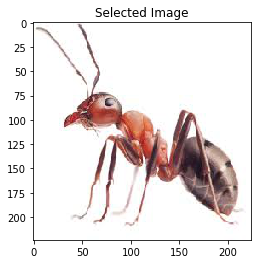

In [10]:
imgClasser('ant.jpeg')

The model was able to classify the image as containing an **ant** with **83.2% likelihood**